In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [9]:
df_ames_reg_train = df_ames_train[['Overall Qual','Neighborhood','SalePrice']]

In [10]:
df_ames_reg_train.shape

(2051, 3)

In [11]:
df_ames_reg_train.isna().sum()

Overall Qual    0
Neighborhood    0
SalePrice       0
dtype: int64

In [12]:

X = df_ames_reg_train[['Overall Qual','Neighborhood']]
y = df_ames_reg_train['SalePrice']
    

In [13]:
X.shape

(2051, 2)

In [14]:
y.shape

(2051,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
X_train.dtypes

Overall Qual     int64
Neighborhood    object
dtype: object

In [17]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [18]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [19]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [20]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'Overall Qual'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [21]:
preds= pipe3.predict(X_test)

In [38]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [ ]:
#pd.DataFrame(lr.coef_.reshape(1, 2), columns=X.columns) 

In [37]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Overall Qual_1',
       'Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4',
       'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7',
       'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10'],
      dtype=object)

In [39]:
pipe3.named_steps['linearregression'].coef_

array([ -1148.2367237 ,  -2778.02622961,  -5685.53837136,  -4777.69580518,
         4460.81632692,   2588.40754121,   5234.97944949,  -5013.08839651,
         1014.57712289,  -1982.77624961,   2992.68507135,  -7463.1898661 ,
         -832.42791013,  -3697.5866238 ,   1230.01773646,  -3034.37484235,
        -3702.50568197,   2436.24451295,  10519.46416464,  11367.92751978,
        -7743.18573529,  -3291.00944791,  -2552.59647565,   1642.41936472,
          -61.81823658,   7526.89303492,   3162.56614619,    227.98865215,
        -5905.29881169,  -7191.25454616,  -9532.21481302, -14996.63933365,
       -17492.18660513,  -6507.51541422,   4977.67454364,  20436.23439729,
        29287.50500188,  20960.45883248])

In [40]:
pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))

,0,1
0,Neighborhood_Blmngtn,-1148.236724
1,Neighborhood_Blueste,-2778.026230
2,Neighborhood_BrDale,-5685.538371
3,Neighborhood_BrkSide,-4777.695805
4,Neighborhood_ClearCr,4460.816327
5,Neighborhood_CollgCr,2588.407541
6,Neighborhood_Crawfor,5234.979449
7,Neighborhood_Edwards,-5013.088397
8,Neighborhood_Gilbert,1014.577123
9,Neighborhood_Greens,-1982.776250


In [22]:
residuals = preds - y_test
residuals

1298   -13699.249136
1899      -87.137394
99     -31675.334577
168     28394.796941
1543   -53299.249136
            ...     
1718    -4193.150837
1703    16470.991844
1600    -9400.266823
810     17190.549472
1577   -22193.150837
Name: SalePrice, Length: 513, dtype: float64

In [23]:
#Evaluate my metrics
print('Linear Regression Model #2 w/Categorical Vars: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #2 w/Categorical Vars: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #2 w/Categorical Vars: R2:', r2_score(y_test, preds))

Linear Regression Model #2 w/Categorical Vars: MAE: 27100.2270034359
Linear Regression Model #2 w/Categorical Vars: MSE: 1400824111.1187975
Linear Model #2 w/Categorical Vars: R2: 0.7566696930683335


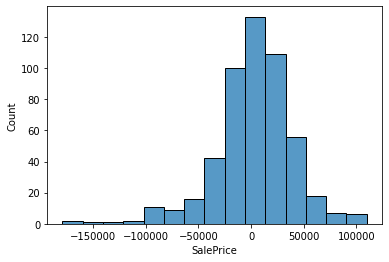

In [24]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

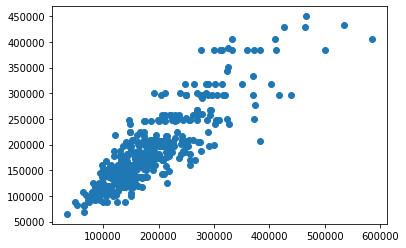

In [25]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

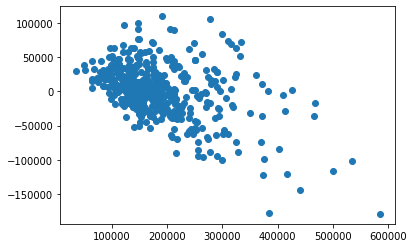

In [26]:
plt.scatter(y_test, residuals);


In [27]:
#Now, I want to use my Linear Regression model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [28]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [29]:
#Pull off only the data I need
df_mini_lreg2_test = df_ames_test[['Overall Qual',  'Neighborhood']]

In [30]:
#Yay!  No missing data here!
df_mini_lreg2_test.isna().sum()

Overall Qual    0
Neighborhood    0
dtype: int64

In [32]:
X_mini_lreg2_test = df_mini_lreg2_test

In [33]:
preds_lr2_kag = pipe3.predict(X_mini_lreg2_test)

In [34]:
df_ames_test['SalePrice'] = preds_lr2_kag

In [36]:
df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/predictions_lr2.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [54]:
df_kaggle = pd.read_csv('./datasets/rdg_predictions_ohe.csv')

In [55]:
df_kaggle.head(2)

,Id,SalePrice
0,2658,133914.990982
1,2718,179090.045185
